In [1]:
import numpy as np
from matplotlib import pyplot as plt
from blackscholes import CallPutForward as CPF
from math import exp, log, sqrt
print("BlackScholes Version v{o.__VERSION__} ({o.__DATE__})".format(o=CPF))

BlackScholes Version v1.0 (22/Dec/2022)


# Option Pricing

## CallPutForward [TEST]

In [2]:
C = CPF(K=100, S=100, T=1, sig=0.2)
assert C.dd == (C.d1,C.d2)
assert C.F == 100
assert C.ff == 1
assert C.df == 1
assert C.ttm == 1
assert abs(C.pv/C.pv_atm-1) < 0.01
assert abs(C.pv/7.965567455405804-1) < 1e-10
assert abs(C.pv_atm/7.978845608028654-1) < 1e-10
assert abs(C.delta/0.5398278323156092-1) < 1e-10
assert abs(C.cashdelta/53.982783231560916-1) < 1e-10
assert abs(C.gamma/0.019847626901992044-1) < 1e-10
assert abs(C.cashgamma/198.47626901992044-1) < 1e-10
assert abs(C.riskgamma/1.9847626901992044-1) < 1e-10
assert abs(C.d1/0.1-1) < 1e-10
assert abs(C.d2/-0.1-1) < 1e-10
assert abs(C.Nd1/0.539827837277029-1) < 1e-10
assert abs(C.Nd2/0.460172162722971-1) < 1e-10

In [3]:
C = CPF(K=100, S=110, T=1, r=0.05, rf=0.10, sig=0.2)
assert C.dd == (C.d1,C.d2)
assert C.F == C.S * exp(C.rf-C.r)
assert C.ff == exp(C.rf-C.r)
assert C.df == exp(-C.r)
assert C.dff == exp(-C.rf)
assert C.ttm == 1
assert C.setv(T=2).ttm == 2
assert C.setv(T=2, t=0.5).ttm == 1.5
assert C.setv(t=0.5).ttm == 0.5
assert abs(C.pv/16.72847454664996-1) < 1e-10
assert abs(C.pv_atm/8.77673016883152-1) < 1e-10
assert abs(C.delta/0.8079622839285023-1) < 1e-10
assert abs(C.cashdelta/88.87585123213526-1) < 1e-10
assert abs(C.gamma/0.01452093609359057-1) < 1e-10
assert abs(C.cashgamma/175.7033267324459-1) < 1e-10
assert abs(C.riskgamma/1.5973029702949626-1) < 1e-10
assert abs(C.d1/0.32655089902162465-1) < 1e-10
assert abs(C.d2/0.12655089902162464-1) < 1e-10
assert abs(C.Nd1/0.6279962069811598-1) < 1e-10
assert abs(C.Nd2/0.5503520693628241-1) < 1e-10

In [4]:
C2 = C.setv(K=110, r=0, rf=0)
assert C.K   == 100
assert C.r   != 0
assert C.rf  != 0
assert C2.K  == 110
assert C2.r  == 0
assert C2.rf == 0
assert abs(C2.pv/C2.pv_atm-1) < 0.01

In [5]:
C3 = C.setv(F=200)
assert abs(C.ff/1.0512710963760241-1) < 1e-10
assert abs(C3.ff/1.0512710963760241-1) < 1e-10
assert C3.F == 200

In [6]:
C4 = C.setv(df=0.9)
assert abs(C.df/0.951229424500714-1) < 1e-10
assert C4.df == 0.9

## Charts

In [7]:
C = CPF(K=100, S=100, T=1, sig=0.2)
C1 = C.setv(T=0.5)
C2 = C.setv(T=0.001)
S_r = np.linspace(50,150,500)

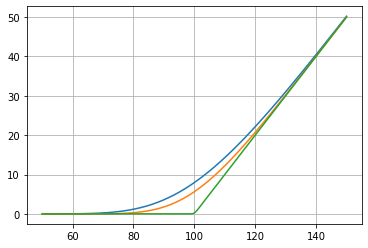

In [8]:
plt.plot(S_r, [C.setv(S=s).pv for s in S_r])
plt.plot(S_r, [C1.setv(S=s).pv for s in S_r])
plt.plot(S_r, [C2.setv(S=s).pv for s in S_r])
plt.grid()

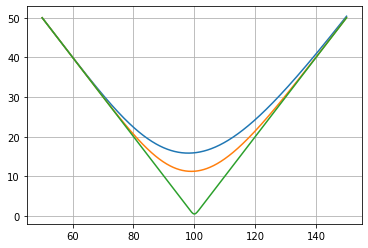

In [9]:
CC = C.setv(N=2, ND=-1)
CC1 = C1.setv(N=2, ND=-1)
CC2 = C2.setv(N=2, ND=-1)
plt.plot(S_r, [CC.setv(S=s).pv for s in S_r])
plt.plot(S_r, [CC1.setv(S=s).pv for s in S_r])
plt.plot(S_r, [CC2.setv(S=s).pv for s in S_r])
plt.grid()

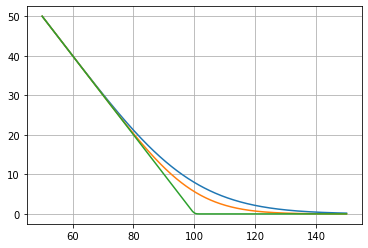

In [10]:
CC = C.setv(ND=-1)
CC1 = C1.setv(ND=-1)
CC2 = C2.setv(ND=-1)
plt.plot(S_r, [CC.setv(S=s).pv for s in S_r])
plt.plot(S_r, [CC1.setv(S=s).pv for s in S_r])
plt.plot(S_r, [CC2.setv(S=s).pv for s in S_r])
plt.grid()

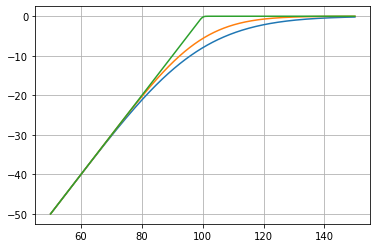

In [11]:
CC = C.setv(N=-1, ND=1)
CC1 = C1.setv(N=-1, ND=1)
CC2 = C2.setv(N=-1, ND=1)
plt.plot(S_r, [CC.setv(S=s).pv for s in S_r])
plt.plot(S_r, [CC1.setv(S=s).pv for s in S_r])
plt.plot(S_r, [CC2.setv(S=s).pv for s in S_r])
plt.grid()

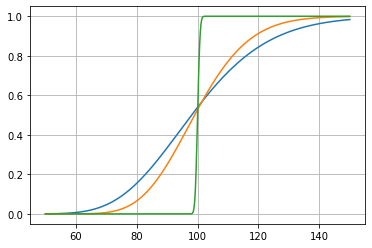

In [12]:
plt.plot(S_r, [C.setv(S=s).delta for s in S_r])
plt.plot(S_r, [C1.setv(S=s).delta for s in S_r])
plt.plot(S_r, [C2.setv(S=s).delta for s in S_r])
plt.grid()

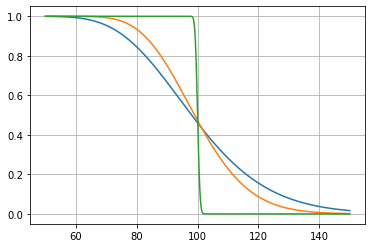

In [13]:
plt.plot(S_r, [CC.setv(S=s).delta for s in S_r])
plt.plot(S_r, [CC1.setv(S=s).delta for s in S_r])
plt.plot(S_r, [CC2.setv(S=s).delta for s in S_r])
plt.grid()

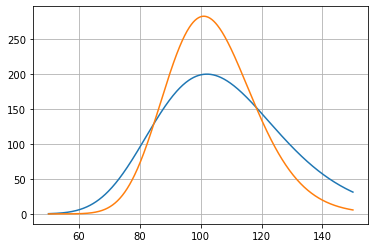

In [14]:
plt.plot(S_r, [C.setv(S=s).cashgamma for s in S_r])
plt.plot(S_r, [C1.setv(S=s).cashgamma for s in S_r])
plt.grid()